## Dbp3 + PRP43 anaylsis


In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import hdbscan
import umap
import os
from scipy.stats import pearsonr, spearmanr

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
twoprimeo_pos = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958, 27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

twoprimeo_pos_25 = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958]

twoprimeo_pos_18 = [27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

In [3]:
pseduo_u_pos = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_18 = [105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_25 = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974]


In [4]:
# final ivt vs native
native_nop58_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/061719_R941_NOP58GAL.csv"
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06102019_R941_CBF5GAL.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06112019_R941_CBF5GLU.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06192019_R941_NOP58GLU.csv"
ivt_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/10142019_R941_IVT.csv"
WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210410_R941_WT_YPD.csv"
YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210405_R941_mutant448.csv"
YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210413_R941_mutant452.csv"
YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210415_R941_mutant451.csv"
WT_stationary = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210521_R941_WT_stationary.csv"
trl1d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210528_R941_trl1d_YPD.csv"
mix = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210618_R941_Mix.csv"
WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210412_R941_WT_KOAC.csv"
WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210414_R941_WT_CY.csv"
WT_PB = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210520_R941_WT_PB.csv"
Dbp3d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210527_R941_Dbp3d_YPD.csv"
WT_rapa5 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210531_R941_WT_rapa5.csv"
prp43_18deg = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210619_R941_prp43.csv"
ys603_18 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/YS603_18_YEPD_20210717.csv"
mix_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/MIX_20210716.csv"
prp16 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/prp16_18deg_YPD_20210719.csv"
spp382 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/spp382_YPD_20210720.csv"
sqs1d = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/sqs1d_YPD_20210730.csv"
dbr1d = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/dbr1d_YPD_20210729.csv"

# external experiments
snR34_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323585.csv"
snR3_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323586.csv"
snR36_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323587.csv"
# low coverage for wt1
sno_flongle_wt1 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323588.csv"
sno_flongle_wt2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475631.csv"
snR60_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475632.csv"
snR61_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475633.csv"
snR62_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475634.csv"
# Minion barcoded runs 
sno_control_wt_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_1.csv"
snr60_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_2.csv"
snr61_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_3.csv"
snr62_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_4.csv"
fraction1_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_1.csv"
fraction2_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_2.csv"
fraction3_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_3.csv"
fraction4_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_4.csv"
temp_stress_control_wt_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_1.csv"
cold_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_2.csv"
heat_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_4.csv"
oxidative_stress_wt_control_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_1.csv"
h2o2_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_2.csv"
oxidative_stress_wt_control_m_f3f4 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_3.csv"
h2o2_stress_f3f4_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_4.csv"
snr3_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_1.csv"
snr34_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_2.csv"
snr36_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_3.csv"
sno_control_wt2_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_4.csv"



In [5]:
all_file_paths = [Dbp3d_YPD, prp43_18deg]
all_labels = ["Dbp3", "prp43"]
contigs = ['RDN25-1', 'RDN18-1']


In [6]:

vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


<IPython.core.display.Javascript object>


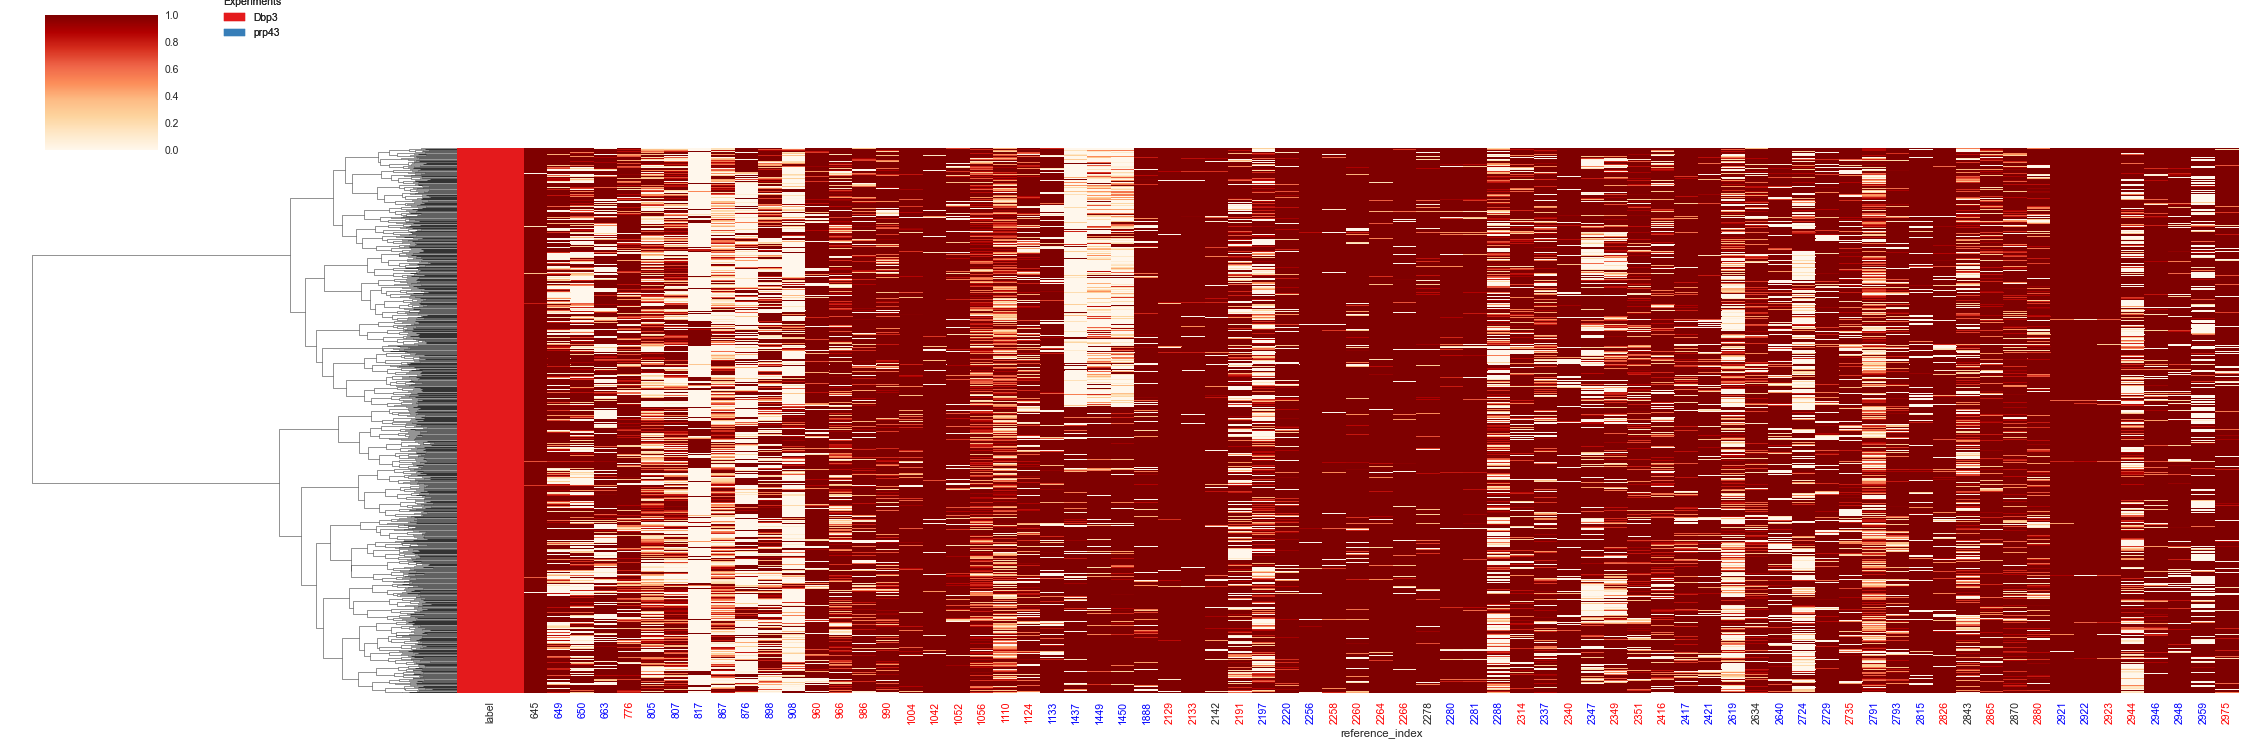

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


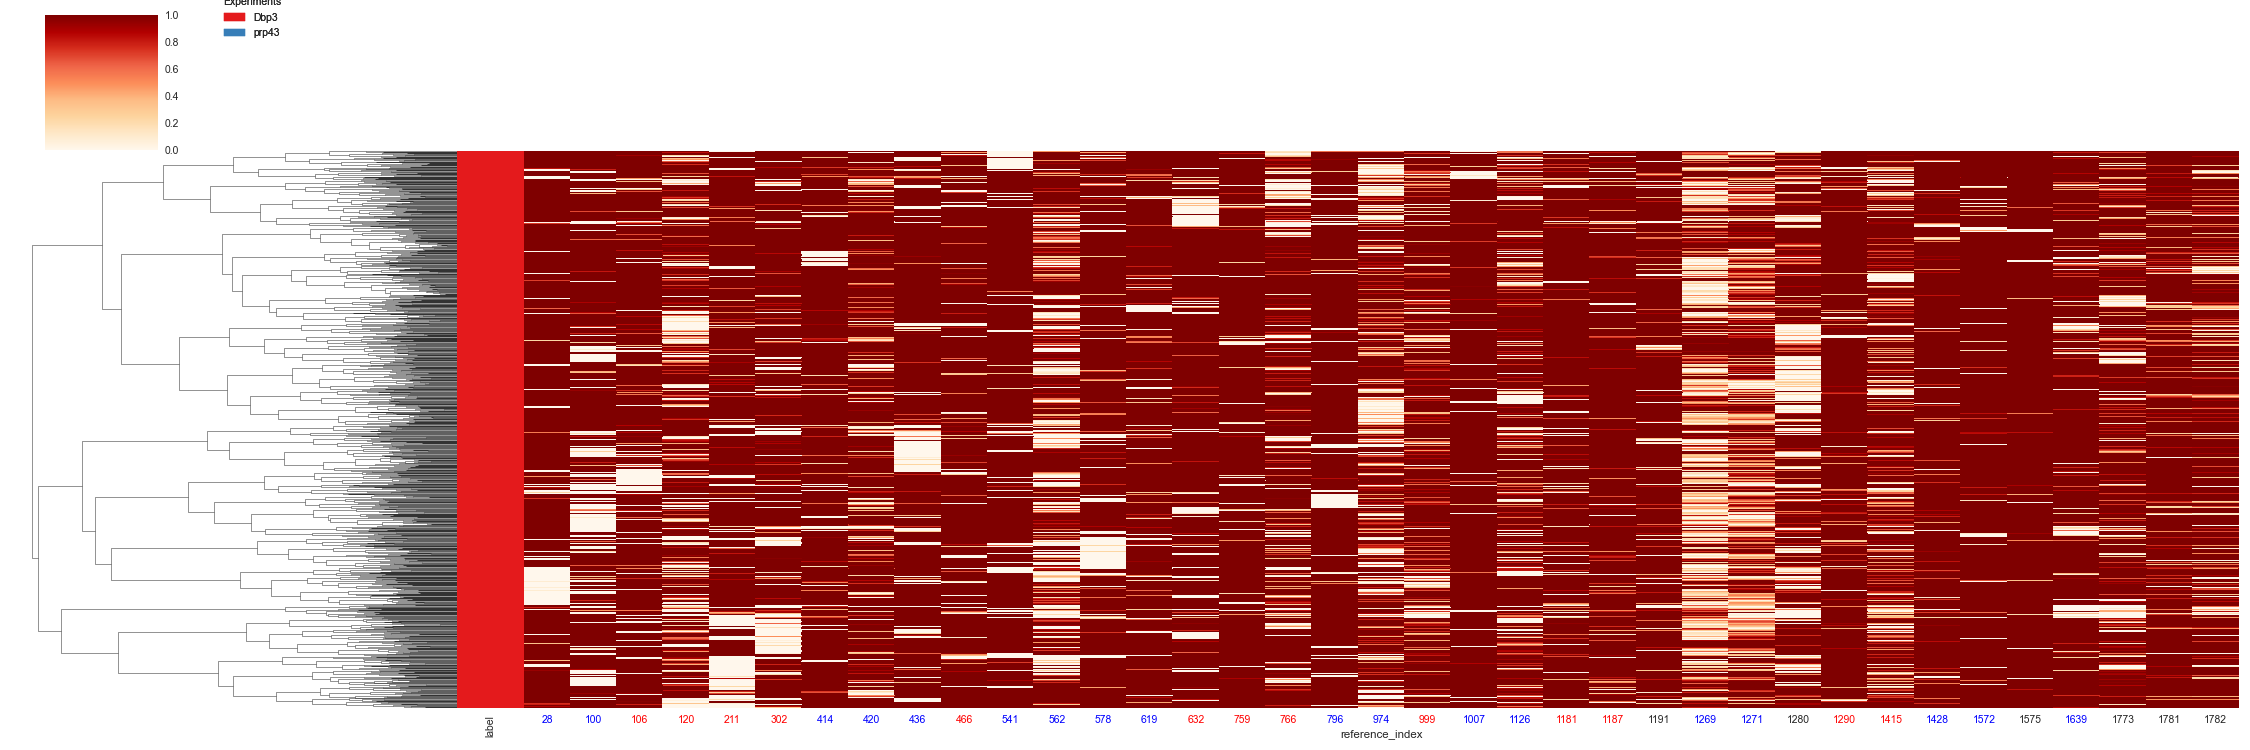

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


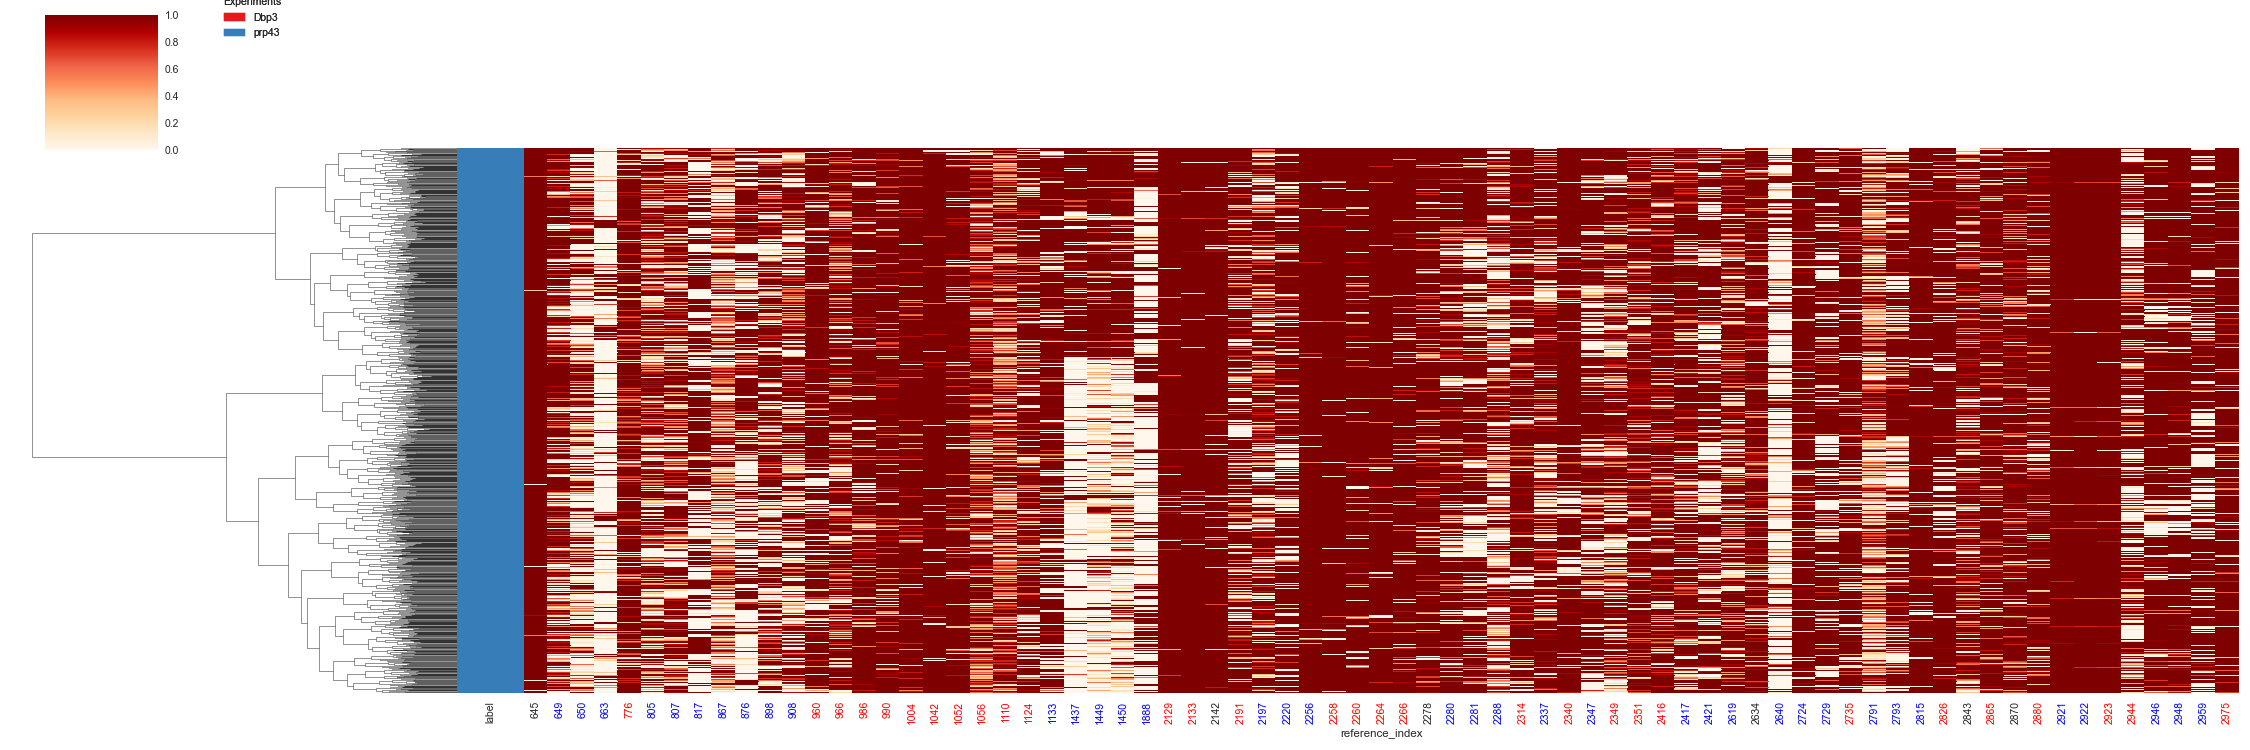

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


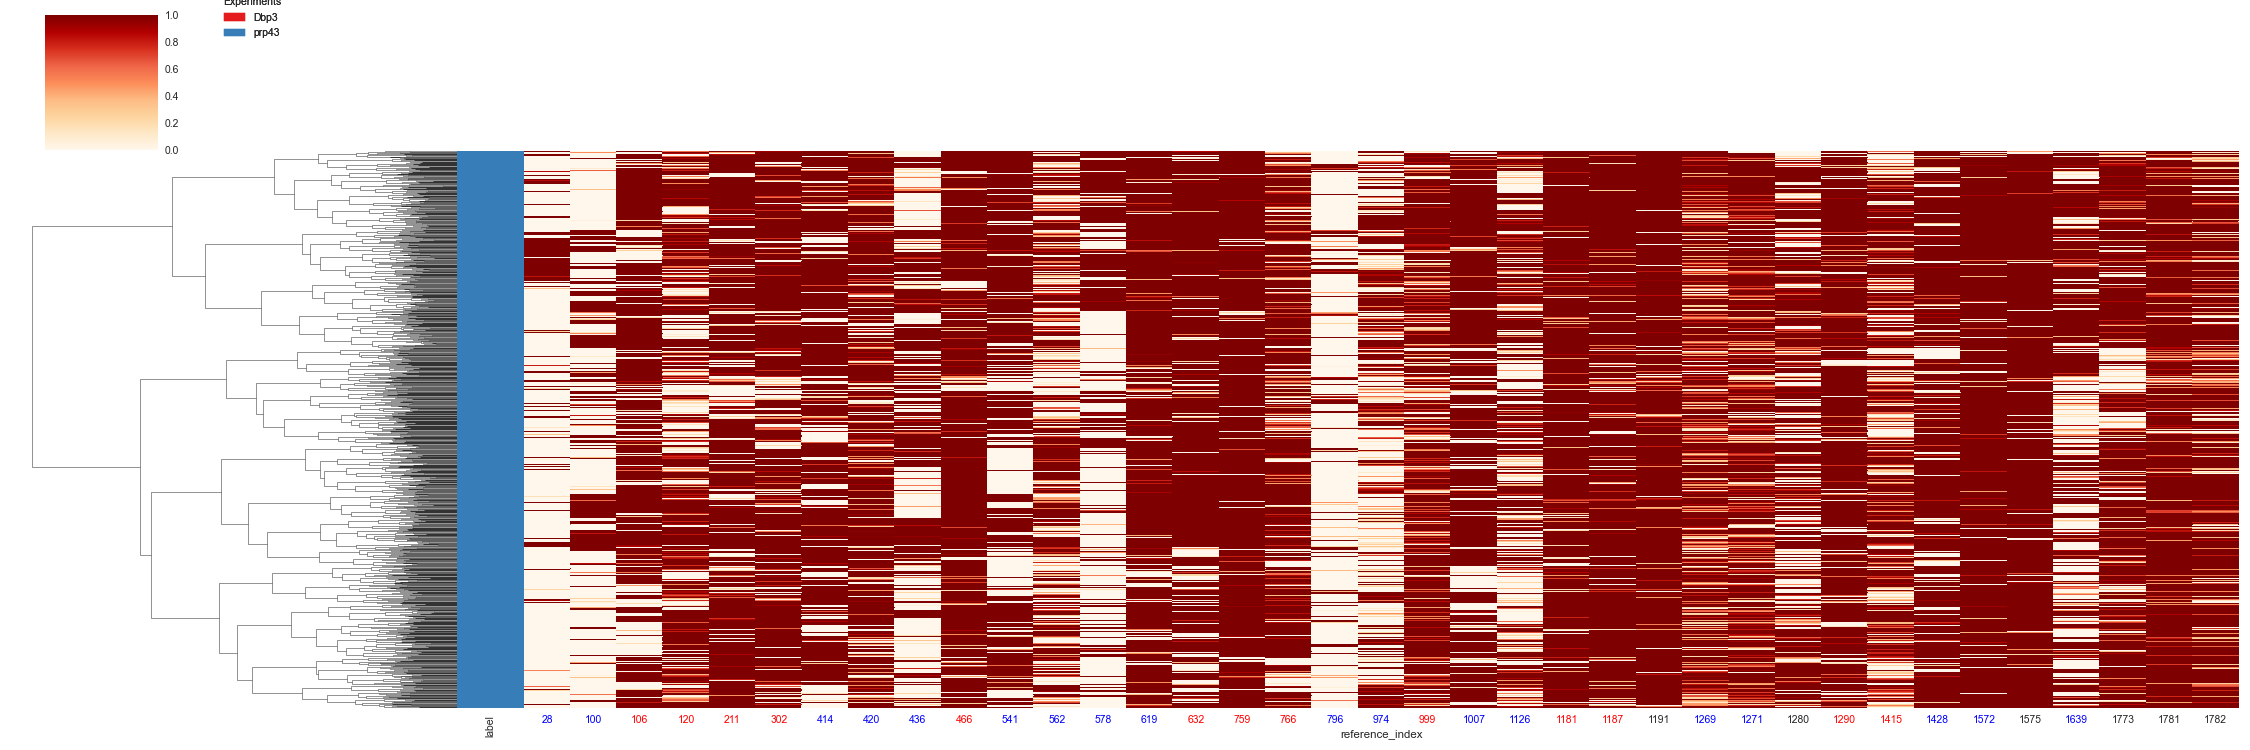

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [9]:
%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"
for label in all_labels:
    for contig in contigs:
        save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{label}_{contig}_dendrogram.png"
        g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), 
                                       label=label, n=n, figure_path=save_fig_path,
                                       metric=metric,
                                       method=method, 
                                       col_cluster=False,
                                       row_cluster=True,
                                       twoprimeo_pos=twoprimeo_pos,
                                       pseduo_u_pos=pseduo_u_pos,
                                      legend=legend,
                                      figsize=figsize)


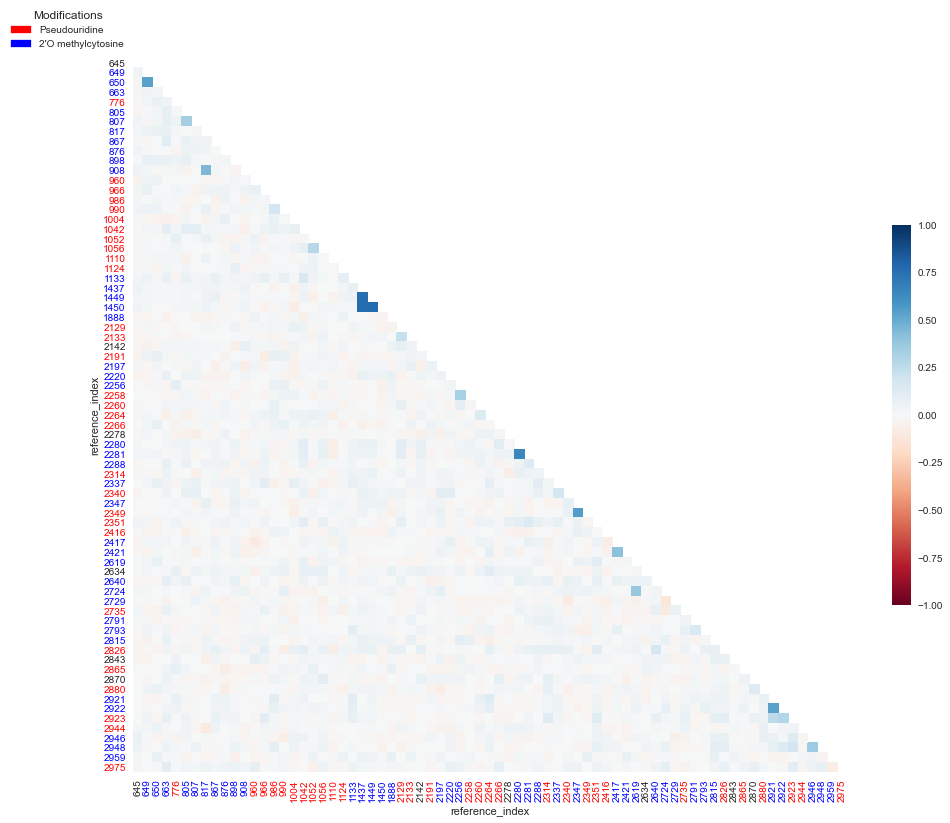

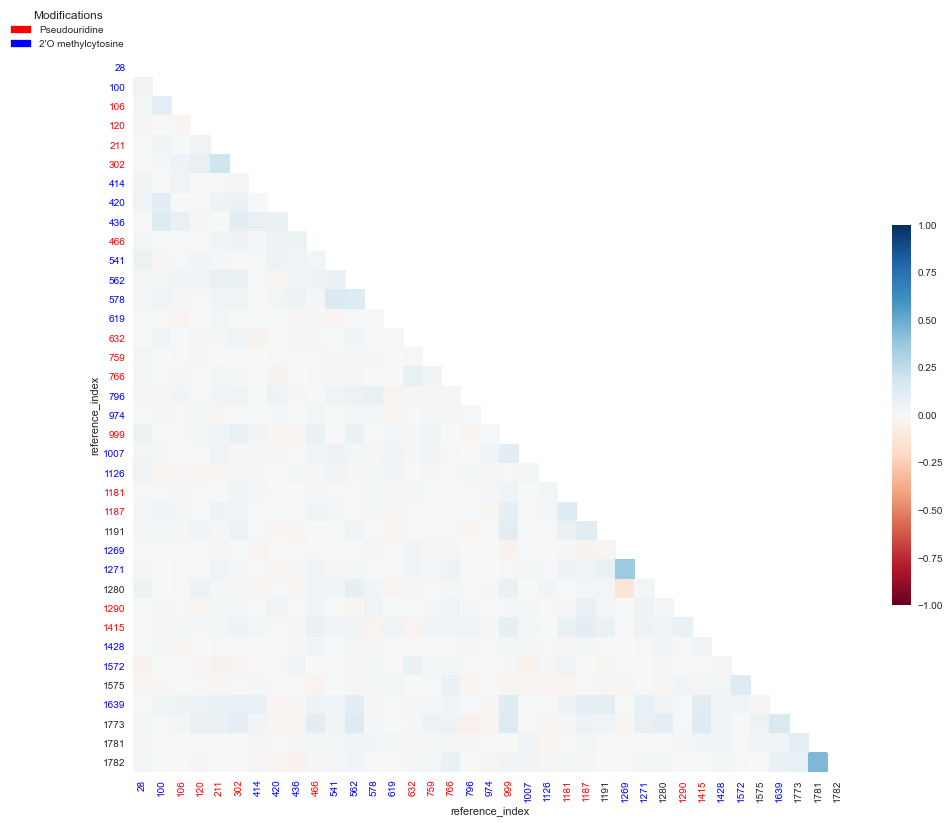

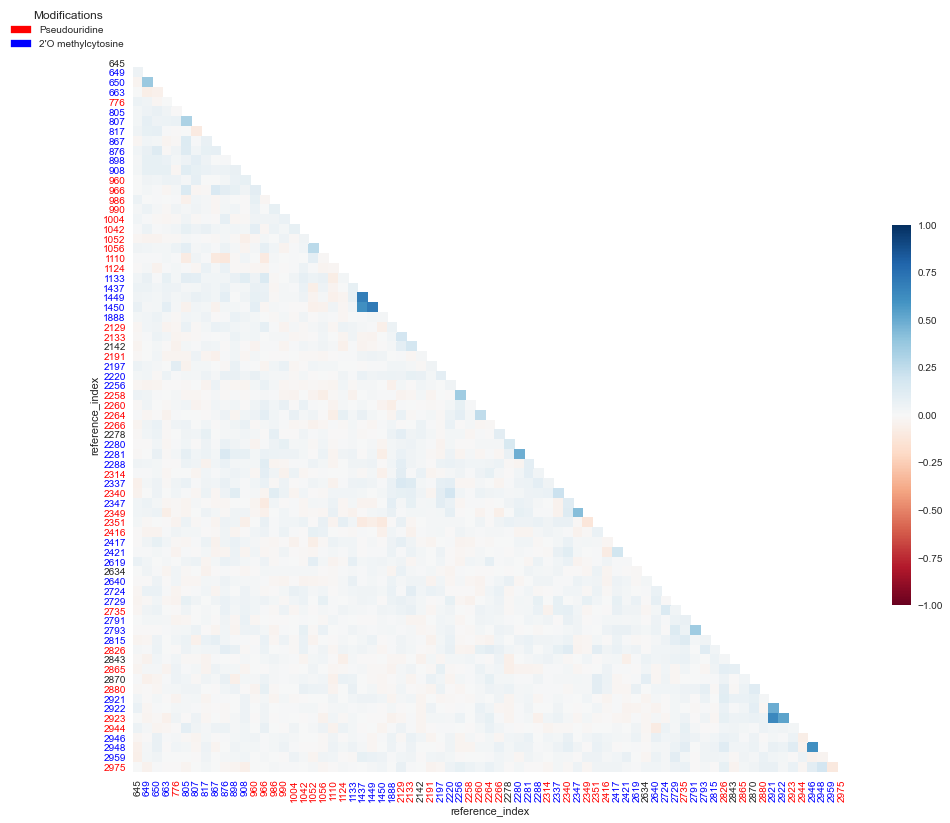

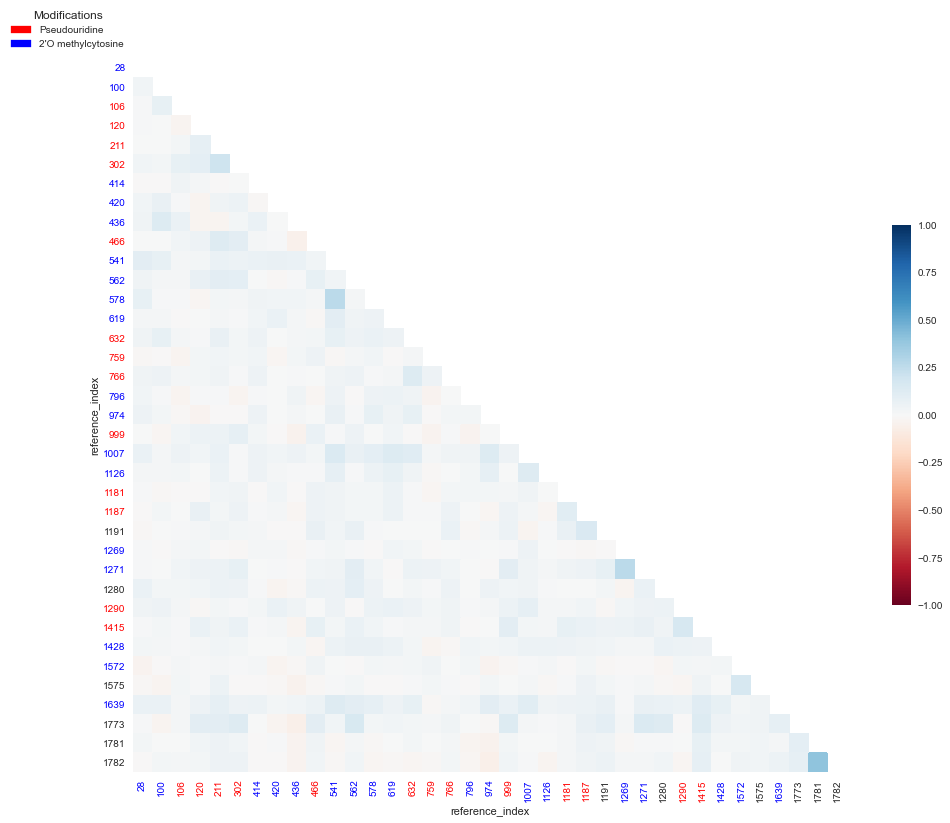

In [12]:
for label in all_labels:
    for contig in contigs:
        save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{label}_{contig}_correlation.png"
        vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), label=label, figure_path=save_fig_path, pseduo_u_pos=pseduo_u_pos, twoprimeo_pos=twoprimeo_pos, vmax=1, vmin=-1)       




# Compare with Ribomet Seq

In [5]:
ribomet_seq_43 = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/ribomet_seq/ribomet_seq.csv"

In [6]:
ribomet_seq = pd.read_csv(ribomet_seq_43)

In [13]:
all_file_paths = [WT_YPD, Dbp3d_YPD, native_cbf5_gal_path, prp43_18deg]
all_labels = ["wt", "dbp3", "cbf5_gal", "prp43_18deg"]
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")



In [14]:
save_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/ribomet_seq_comparison"

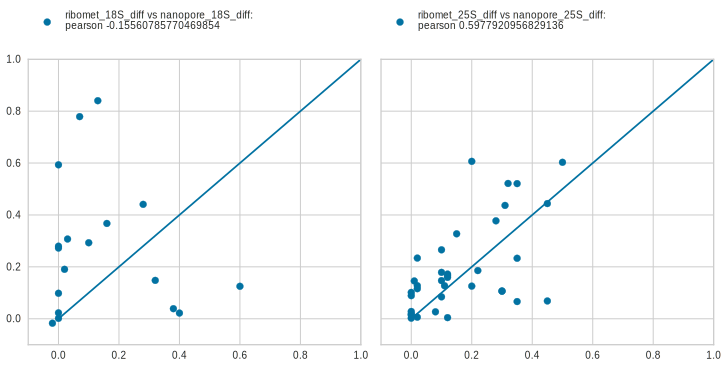

In [27]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True, constrained_layout=True)

ribomet_18S_diff = (ribomet_seq["wt"] - ribomet_seq["prp43"])[ribomet_seq["contig"] == "18S"]
ribomet_25S_diff = (ribomet_seq["wt"] - ribomet_seq["prp43"])[ribomet_seq["contig"] == "25S"]

contig = "RDN18-1"
prp43 = vc.get_X(contig, vc.get_contig_positions(contig), label="prp43_18deg")
wt = vc.get_X(contig, vc.get_contig_positions(contig), label="wt")
nanopore_18S_diff = wt.mean() - prp43.mean()
nanopore_18S_diff = nanopore_18S_diff[nanopore_18S_diff.index.isin(ribomet_seq[ribomet_seq["contig"] == "18S"]["pos"]-1)]

contig = "RDN25-1"
prp43 = vc.get_X(contig, vc.get_contig_positions(contig), label="prp43_18deg")
wt = vc.get_X(contig, vc.get_contig_positions(contig), label="wt")
nanopore_25S_diff = wt.mean() - prp43.mean()
nanopore_25S_diff = nanopore_25S_diff[nanopore_25S_diff.index.isin(ribomet_seq[ribomet_seq["contig"] == "25S"]["pos"]-1)]

axs[0].scatter(ribomet_18S_diff / 100, nanopore_18S_diff, label=f"ribomet_18S_diff vs nanopore_18S_diff: \n pearson {pearsonr(ribomet_18S_diff / 100, nanopore_18S_diff)[0]}")
x = np.linspace(0, 1)
axs[0].plot(x, x)
axs[0].set_xlim(-0.1, 1)
axs[0].set_ylim(-0.1, 1)

axs[1].scatter(ribomet_25S_diff / 100, nanopore_25S_diff, label=f"ribomet_25S_diff vs nanopore_25S_diff: \n pearson {pearsonr(ribomet_25S_diff / 100, nanopore_25S_diff)[0]}")
x = np.linspace(0, 1)
axs[1].plot(x, x)
axs[1].set_xlim(-0.1, 1)
axs[1].set_ylim(-0.1, 1)

axs[0].legend(bbox_to_anchor=(0, 1.2), loc='upper left')
axs[1].legend(bbox_to_anchor=(0, 1.2), loc='upper left')
figure_path = os.path.join(save_path, "nanopore_vs_ribomet_prp43.svg")
fig.savefig(figure_path, dpi=1000)


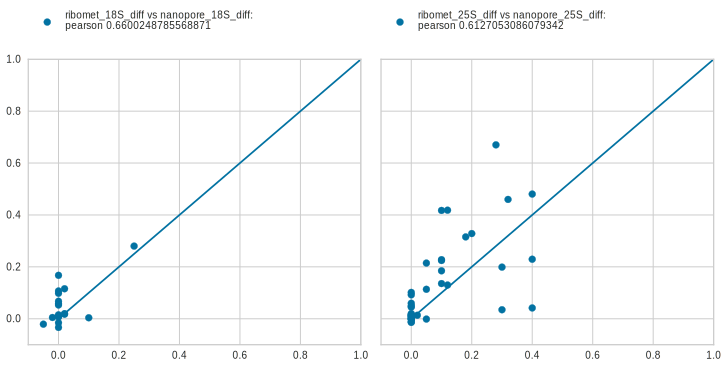

In [26]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True, constrained_layout=True)

ribomet_18S_diff = (ribomet_seq["wt"] - ribomet_seq["dbp3"])[ribomet_seq["contig"] == "18S"]
ribomet_25S_diff = (ribomet_seq["wt"] - ribomet_seq["dbp3"])[ribomet_seq["contig"] == "25S"]

contig = "RDN18-1"
prp43 = vc.get_X(contig, vc.get_contig_positions(contig), label="dbp3")
wt = vc.get_X(contig, vc.get_contig_positions(contig), label="wt")
nanopore_18S_diff = wt.mean() - prp43.mean()
nanopore_18S_diff = nanopore_18S_diff[nanopore_18S_diff.index.isin(ribomet_seq[ribomet_seq["contig"] == "18S"]["pos"]-1)]

contig = "RDN25-1"
prp43 = vc.get_X(contig, vc.get_contig_positions(contig), label="dbp3")
wt = vc.get_X(contig, vc.get_contig_positions(contig), label="wt")
nanopore_25S_diff = wt.mean() - prp43.mean()
nanopore_25S_diff = nanopore_25S_diff[nanopore_25S_diff.index.isin(ribomet_seq[ribomet_seq["contig"] == "25S"]["pos"]-1)]

axs[0].scatter(ribomet_18S_diff / 100, nanopore_18S_diff, label=f"ribomet_18S_diff vs nanopore_18S_diff: \n pearson {pearsonr(ribomet_18S_diff / 100, nanopore_18S_diff)[0]}")
x = np.linspace(0, 1)
axs[0].plot(x, x)
axs[0].set_xlim(-0.1, 1)
axs[0].set_ylim(-0.1, 1)

axs[1].scatter(ribomet_25S_diff / 100, nanopore_25S_diff, label=f"ribomet_25S_diff vs nanopore_25S_diff: \n pearson {pearsonr(ribomet_25S_diff / 100, nanopore_25S_diff)[0]}")
x = np.linspace(0, 1)
axs[1].plot(x, x)
axs[1].set_xlim(-0.1, 1)
axs[1].set_ylim(-0.1, 1)

axs[0].legend(bbox_to_anchor=(0, 1.2), loc='upper left')
axs[1].legend(bbox_to_anchor=(0, 1.2), loc='upper left')
figure_path = os.path.join(save_path, "nanopore_vs_ribomet_dbp3.svg")
plt.savefig(figure_path, dpi=1000)


In [ ]:
all_file_paths = [WT_YPD, Dbp3d_YPD, native_cbf5_gal_path, prp43_18deg]
all_labels = ["wt", "dbp3", "cbf5_gal", "prp43_18deg"]
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


In [54]:
contig = "RDN18-1"
prp43 = vc.get_X(contig, vc.get_contig_positions(contig), label="prp43_18deg")
wt = vc.get_X(contig, vc.get_contig_positions(contig), label="wt")
dbp3 = vc.get_X(contig, vc.get_contig_positions(contig), label="dbp3")


In [52]:
non_methyl = [x not in twoprimeo_pos for x in (wt.mean() - prp43.mean()).index.values]
((wt.mean() - prp43.mean())[non_methyl]).sort_values()


reference_index
210    -0.087398
301    -0.070710
765    -0.050143
1180   -0.038201
631    -0.018168
758    -0.016512
465    -0.014848
1190    0.000019
1186    0.009134
1780    0.009630
1781    0.011187
1574    0.012675
998     0.018392
119     0.035037
1414    0.036727
1289    0.040865
1772    0.066172
1279    0.126098
105     0.126243
dtype: float64

In [55]:
non_methyl = [x not in twoprimeo_pos for x in (wt.mean() - dbp3.mean()).index.values]
((wt.mean() - dbp3.mean())[non_methyl]).sort_values()


reference_index
210    -0.065133
1414   -0.060703
765    -0.059856
301    -0.044718
1180   -0.041683
105    -0.018601
631    -0.016978
465    -0.012864
758    -0.012592
1186   -0.012491
998    -0.009543
1289   -0.009110
1781   -0.007165
1780    0.004332
1574    0.007102
1190    0.011905
119     0.026274
1772    0.031736
1279    0.092755
dtype: float64

In [56]:
contig = "RDN25-1"
prp43 = vc.get_X(contig, vc.get_contig_positions(contig), label="prp43_18deg")
wt = vc.get_X(contig, vc.get_contig_positions(contig), label="wt")
dbp3 = vc.get_X(contig, vc.get_contig_positions(contig), label="dbp3")


In [57]:
non_methyl = [x not in twoprimeo_pos for x in (wt.mean() - dbp3.mean()).index.values]
((wt.mean() - dbp3.mean())[non_methyl]).sort_values()


reference_index
2132   -0.059313
2734   -0.054313
2869   -0.048909
1055   -0.044063
2128   -0.027410
2825   -0.024264
1109   -0.023991
2879   -0.022859
2313   -0.020385
2190   -0.019845
1003   -0.018795
2864   -0.017758
2277   -0.017666
1123   -0.013456
2350   -0.013236
2265   -0.012684
2259   -0.011934
2339   -0.011266
2415   -0.009703
985    -0.008301
1051   -0.007757
2141   -0.007412
2633   -0.006200
2263   -0.006100
2943   -0.004516
959    -0.001116
1041    0.000473
2922    0.001534
644     0.003153
2257    0.004762
2974    0.017722
989     0.018448
775     0.019771
965     0.027841
2842    0.030702
2348    0.063494
dtype: float64

In [58]:
non_methyl = [x not in twoprimeo_pos for x in (wt.mean() - prp43.mean()).index.values]
((wt.mean() - prp43.mean())[non_methyl]).sort_values()


reference_index
2734   -0.072007
2132   -0.055440
2190   -0.045500
2869   -0.033817
1109   -0.025470
2633   -0.021200
989    -0.016897
2128   -0.015995
1003   -0.014259
2842   -0.013428
775    -0.005518
2259   -0.004691
2263   -0.002981
2879   -0.001385
1051   -0.000722
985     0.000835
644     0.001412
2141    0.004880
2415    0.006553
1123    0.007567
2922    0.008354
2864    0.009891
1041    0.010810
2974    0.014202
1055    0.016968
2313    0.017647
2265    0.019658
2257    0.020033
2339    0.022872
2943    0.031116
2350    0.032156
965     0.044778
2825    0.046186
959     0.046811
2277    0.048259
2348    0.115721
dtype: float64

### Correlations

In [5]:
all_file_paths = [WT_YPD, Dbp3d_YPD, native_cbf5_gal_path, prp43_18deg]
all_labels = ["wt", "dbp3", "cbf5_gal", "prp43_18deg"]
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")

In [6]:
data = vc.get_experiment_spearman_correlations()

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


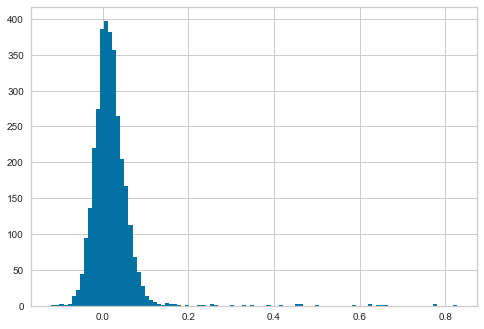

In [16]:
data["dbp3_corr"].hist(bins=100)
# data["dbp3_pvalue"].hist(bins=100)